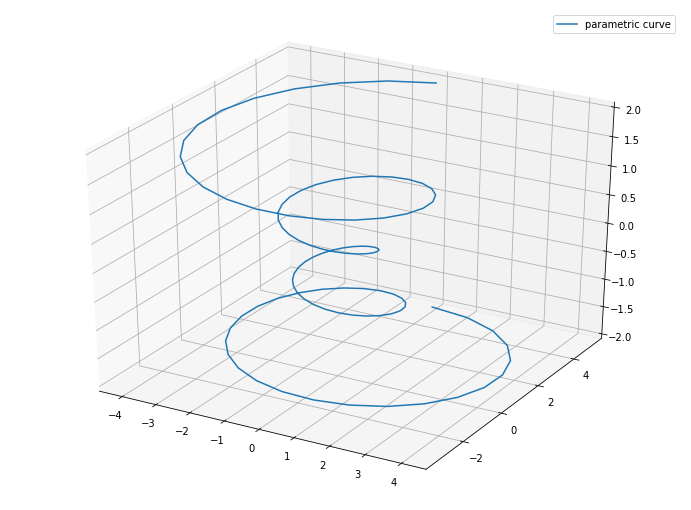

In [229]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

#Line plots

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')
theta = np.linspace(-4 * np.pi, 4 * np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
ax.plot(x, y, z, label='parametric curve')
ax.legend()

plt.show()

In [242]:
#!conda install ImageMagick
!conda install ffmpeg

Fetching package metadata .............



PackageNotFoundError: Packages missing in current channels:
            
  - ffmpeg

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/win-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/win-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/win-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/win-64
  - https://repo.continuum.io/pkgs/pro/noarch
  - https://repo.continuum.io/pkgs/msys2/win-64
  - https://repo.continuum.io/pkgs/msys2/noarch
            



In [240]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

#Settings
DELTA_T=0.01
STEPS=2000
STEPS_PER_FRAME=4
PADDING = 2.5
OUTPUT_DIR='lorenz_attractor'


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

# Function that calculates points belonging to the trajectory, for a specified starting point and time step
def build_lorenz_trajectory(dt, steps, initial_values=(0., 1., 1.05), s=10, r=28, b=2.667):
    xs = np.empty((steps + 1,))
    ys = np.empty((steps + 1,))
    zs = np.empty((steps + 1,))
    
    xs[0], ys[0], zs[0] = initial_values
    
    for i in range(steps):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        
    return (xs, ys, zs)

# create a blank 3D chart with styling
def create_blank_chart_with_styling(data, ax_padding, plot_size):
    # my favorite styling kit
    plt.style.use('dark_background')
    # determining the size of the graph
    fig = plt.figure(figsize=plot_size)
    # 3D mode
    ax = fig.gca(projection='3d')
    # transparent axis pane background 
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    # setting chart axis names
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    
    xs = np.array([])
    ys = np.array([])
    zs = np.array([])
    
    for trajectory in data:
        xs = np.append(xs, trajectory[0])
        ys = np.append(ys, trajectory[1])
        zs = np.append(zs, trajectory[2])
    
    ax.set_xlim3d(xs.min() - ax_padding, xs.max() + ax_padding)
    ax.set_ylim3d(ys.min() - ax_padding, ys.max() + ax_padding)
    ax.set_zlim3d(zs.min() - ax_padding, zs.max() + ax_padding)
    return (fig, ax)

initial_conditions = [
    (0., 1., 1.05),
    (0., 1., 1.06),
    (0., 1., 1.07),
]
colors = [
    "#99b898",
    "#fecea8",
    "#e84a5f",
]

# Calculation of the points belonging to the three trajectories, based on the given starting conditions
plots_data = [build_lorenz_trajectory(DELTA_T, STEPS, 
    initial_values=initial_conditions[i]) for i in range(3)]

# Creation of an empty chart
fig, ax = create_blank_chart_with_styling(plots_data, PADDING, (8, 8))

# Setting up (for the time being empty) data sequences
plots = [ax.plot([],[],[], color=colors[i], label=str(initial_conditions[i]),
    lw=2, alpha=0.75, animated=True)[0] for i in range(3)]

# Each trajectory starts with a point moving in space
dots = [ax.scatter([],[],[], s=100, c=colors[i], animated=True) for i in range(3)]

# Updating chart
def update(i):
    frame_end = (i + 1) * STEPS_PER_FRAME
    for plot, dot, data in zip(plots, dots, plots_data):
        xs, ys, zs = data
        # Updating the trajectory
        plot.set_data(xs[:frame_end], ys[:frame_end])
        plot.set_3d_properties(zs[:frame_end])
        # Updating the position of dots
        dot._offsets3d = ([xs[frame_end]], [ys[frame_end]], [zs[frame_end]])
        
    # Adding a legend
    ax.legend(loc=2, prop={'size': 10})
    # Rotating the chart
    ax.view_init(30, 45 + i)
        
# Animation creation
anim = FuncAnimation(fig, update, frames=np.arange(0, int(STEPS/STEPS_PER_FRAME)), interval=40)

plt.show()
# Saving animation
anim.save('lorenz_attractor.gif', dpi=80, writer='imagemagick')
from IPython.display import Image
Image(url=’lorenz_attractor.gif’)

SyntaxError: invalid character in identifier (<ipython-input-240-692e03dc4da8>, line 118)

In [239]:
#Scatter 3D plots

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

def randrange(n,vmin,vmax):
    
    return (vmax-vmin)*np.random.randn(n)+vmin

fig=plt.figure(figsize=(12,9))
ax=fig.add_subplot(111,projection='3d')

n=100
    
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].

for c,m,zlow,zhigh in [('r','o',-50,-25),('b','^',-30,-5)]:
    xs=randrange(n,23,32)
    ys=randrange(n,0,100)
    zs=randrange(n,zlow,zhigh)
    ax.scatter(xs,ys,zs,c=c, marker=m)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

SyntaxError: invalid character in identifier (<ipython-input-239-464f622dbc0c>, line 33)

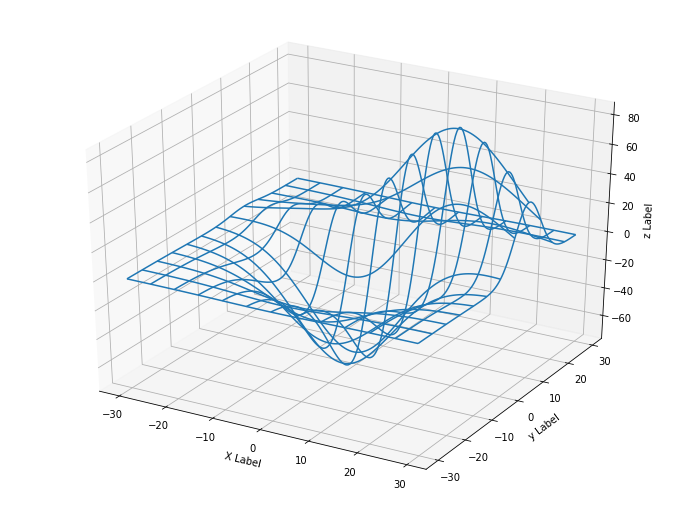

In [157]:
#Wireframe Plots
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d

fig=plt.figure(figsize=(12,9))
ax=fig.add_subplot(111,projection='3d')

X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

ax.set_xlabel('X Label')
ax.set_ylabel('y Label')
ax.set_zlabel('z Label')

plt.show()

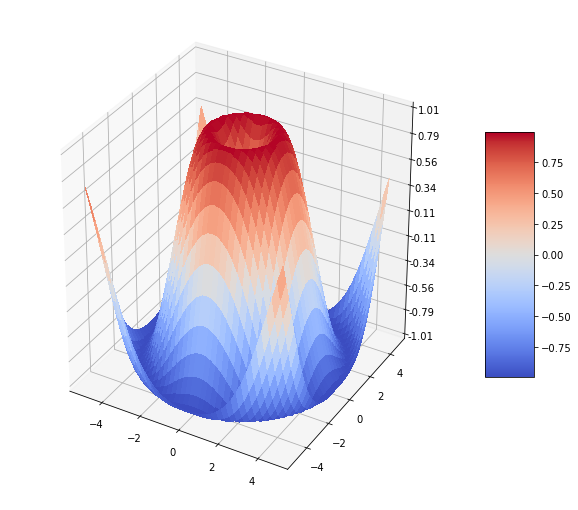

In [156]:
#Surface Plots
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib import cm

fig=plt.figure(figsize=(10,9))
ax=fig.gca(projection='3d')

x=np.arange(-5,5,0.25)
y=np.arange(-5,5,0.25)
x,y=np.meshgrid(x,y)
R=np.sqrt(x**2+y**2)
z=np.sin(R)

surf=ax.plot_surface(x,y,z, cmap=cm.coolwarm,
                    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

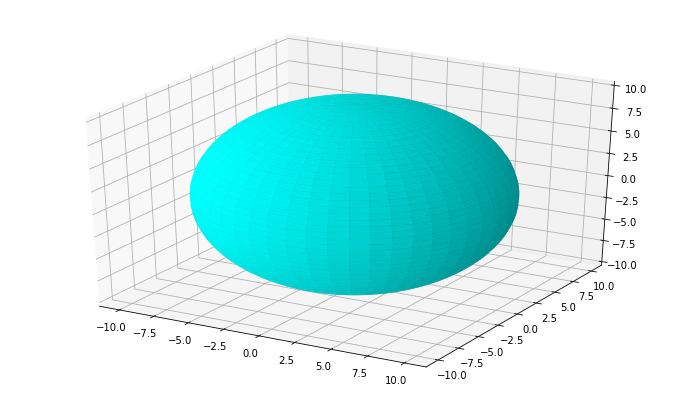

In [225]:
fig=plt.figure(figsize=(12,7))
ax=fig.add_subplot(111,projection='3d')

#make Data


u=np.linspace(0,2*np.pi,100)
v=np.linspace(0,np.pi,100)

x = 10 * np.outer(np.cos(u), np.sin(v))
y = 10 * np.outer(np.sin(u), np.sin(v))
z = 10 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x,y,z,color='#00FFFF')

plt.show()

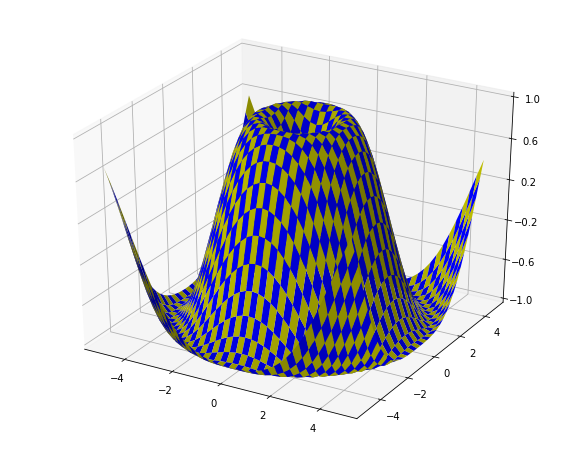

In [152]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from matplotlib.ticker import LinearLocator

fig=plt.figure(figsize=(10,8))
ax=fig.gca(projection='3d')

#make Data
X=np.arange(-5,5,0.25)
xlen=len(X)
Y=np.arange(-5,5,0.25)
ylen=len(Y)
X,Y=np.meshgrid(X,Y)
R=np.sqrt(X**2+Y**2)
z=np.sin(R)

colortuple=('y','b')
colors=np.empty(X.shape, dtype=str)
for y in range(ylen):                                 # Lower case x and y
    for x in range(xlen):
        colors[x,y]=colortuple[(x+y) %len(colortuple)]

surf=ax.plot_surface(X,Y,z, facecolors=colors, linewidth=0)
ax.set_zlim(-1,1)
ax.w_zaxis.set_major_locator(LinearLocator(6))

plt.show()

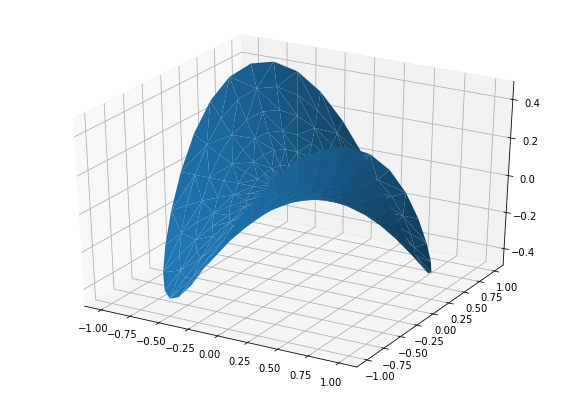

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#make Data

n_radii=8
n_angles=36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).

radii=np.linspace(0.125,1.0, n_radii)
angles=np.linspace(0,2*np.pi,n_angles,endpoint=False)

# Repeat all angles for each radius.

angles=np.repeat(angles[...,np.newaxis],n_radii,axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
fig=plt.figure(figsize=(12,7))

x=np.append(0, (radii*np.cos(angles)).flatten())
y=np.append(0,(radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z=np.sin(-x*y)

fig=plt.figure(figsize=(10,7))
ax=fig.gca(projection='3d')

ax.plot_trisurf(x,y,z,linewidth=0.2, antialiased=True)

plt.show()

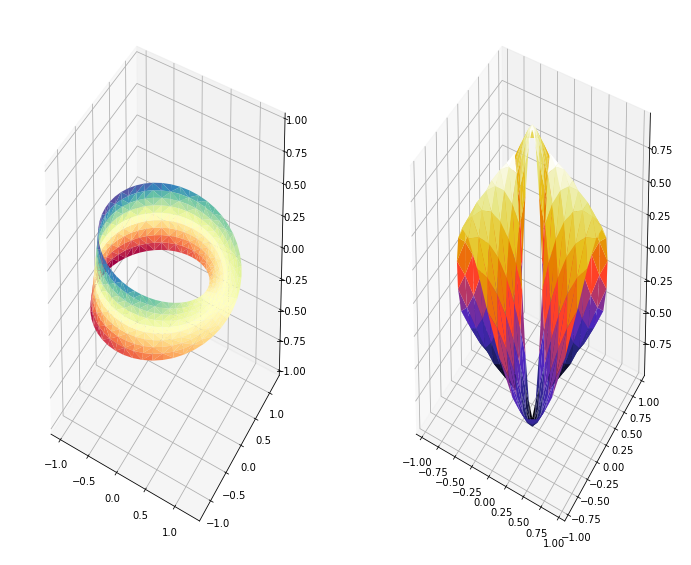

In [154]:
import matplotlib.tri as mtri

fig=plt.figure(figsize=(12,10))

u= np.linspace(0,2.0*np.pi, endpoint=True,num=50)
v=np.linspace(-0.5,0.5, endpoint=True,num=10)
u,v=np.meshgrid(u,v)
u,v=u.flatten(),v.flatten() # flatten() or ravel() use to convert 2D array into single Array

#This is the Mobius mapping, taking a u, v pair and returning an x, y, z
x=(1+0.5*v*np.cos(u/2.0))*np.cos(u)
y=(1+0.5*v*np.cos(u/2.0))*np.sin(u)
z=0.5 * v * np.sin(u/2.0)

# Triangulate parameter space to determine the triangles

tri=mtri.Triangulation(u, v)

ax=fig.add_subplot(1,2,1,projection='3d')
ax.plot_trisurf(x,y,z,triangles=tri.triangles,cmap=plt.cm.Spectral)
ax.set_zlim(-1,1)


# 2nd Plot

n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)

angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi/n_angles

# Map radius, angle pairs to x, y, z points.
x = (radii*np.cos(angles)).flatten()
y = (radii*np.sin(angles)).flatten()
z = (np.cos(radii)*np.cos(angles*3.0)).flatten()

# Create the Triangulation; no triangles so Delaunay triangulation created.
triang = mtri.Triangulation(x, y)

# Mask off unwanted triangles.
xmid = x[triang.triangles].mean(axis=1)
ymid = y[triang.triangles].mean(axis=1)
mask = np.where(xmid**2 + ymid**2 < min_radius**2, 1, 0)
triang.set_mask(mask)

# Plot the surface.
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_trisurf(triang, z, cmap=plt.cm.CMRmap)


plt.show()

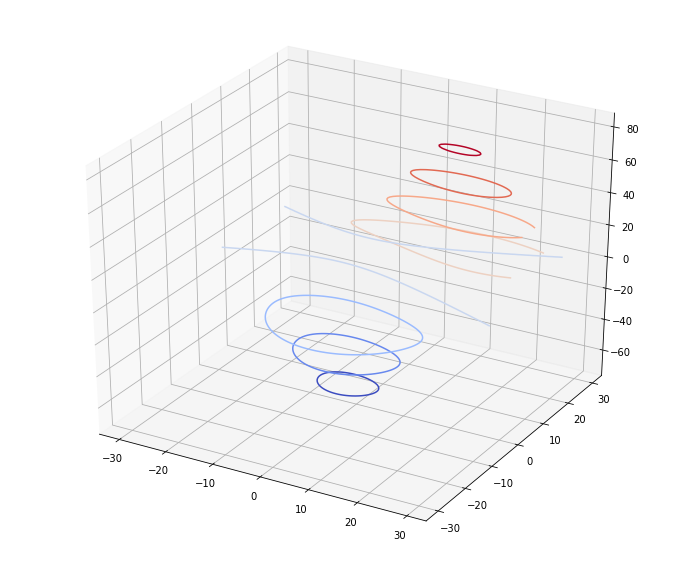

In [179]:
#Contour Graphs
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z,cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()


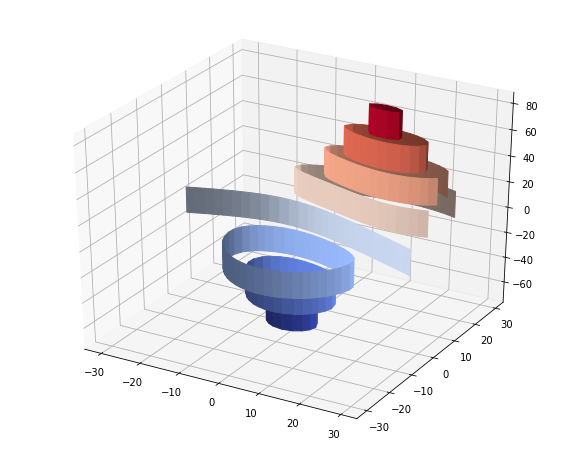

In [175]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contour(X, Y, Z, extend3d=True, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()


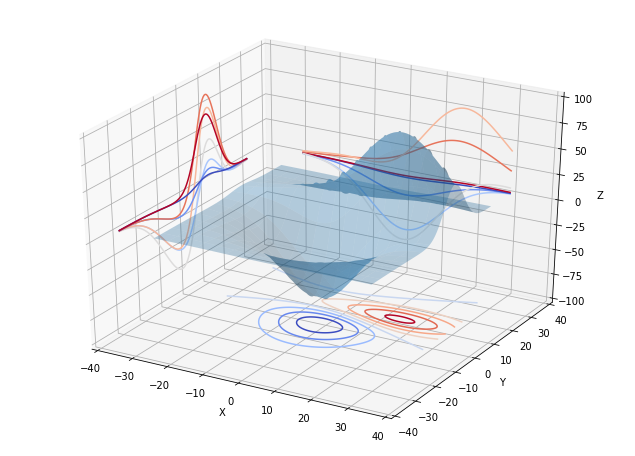

In [181]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(11,8))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

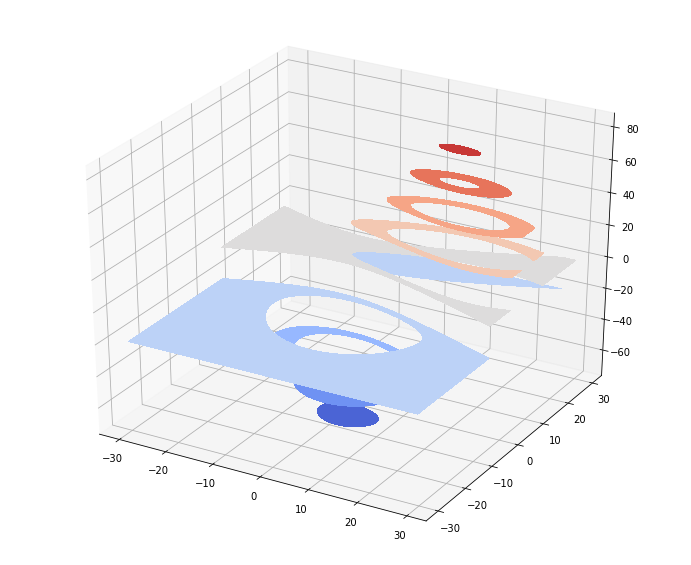

In [183]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contourf(X, Y, Z, cmap=cm.coolwarm)
ax.clabel(cset, fontsize=9, inline=1)

plt.show()

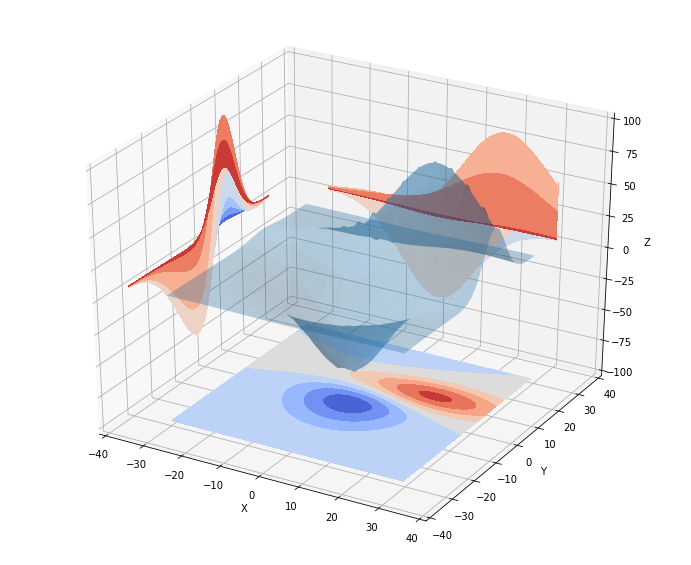

In [186]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

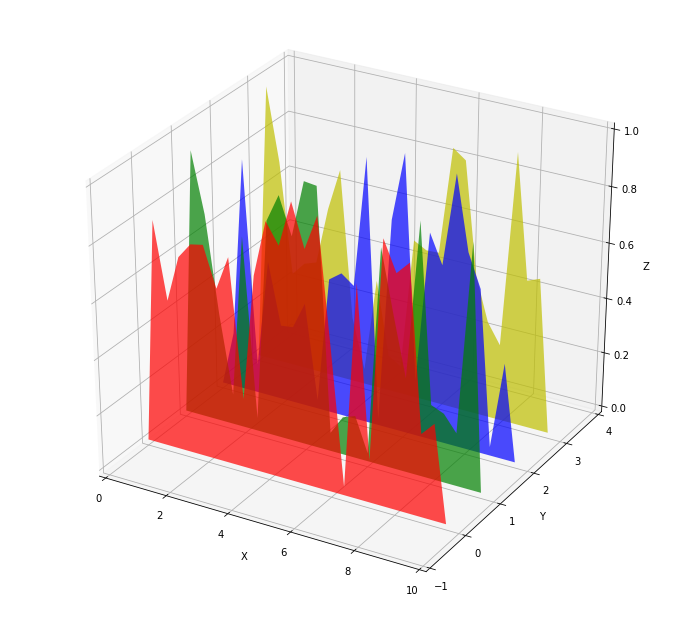

In [188]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np


fig = plt.figure(figsize=(12,11))
ax = fig.gca(projection='3d')


def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

xs = np.arange(0, 10, 0.4)
verts = []
zs = [0.0, 1.0, 2.0, 3.0]
for z in zs:
    ys = np.random.rand(len(xs))
    ys[0], ys[-1] = 0, 0
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[cc('r'), cc('g'), cc('b'),
                                         cc('y')])
poly.set_alpha(0.7)
ax.add_collection3d(poly, zs=zs, zdir='y')

ax.set_xlabel('X')
ax.set_xlim3d(0, 10)
ax.set_ylabel('Y')
ax.set_ylim3d(-1, 4)
ax.set_zlabel('Z')
ax.set_zlim3d(0, 1)

plt.show()


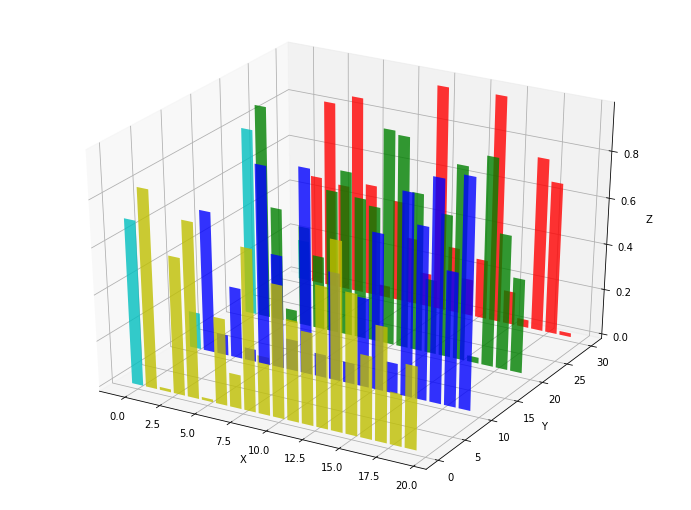

In [190]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    cs[0] = 'c'
    ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

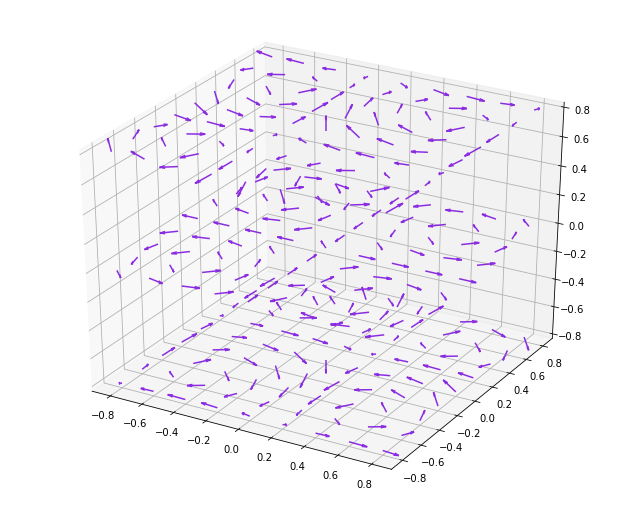

In [227]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(11,9))
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.2),
                      np.arange(-0.8, 1, 0.8))

# Make the direction data for the arrows
u = np.sin(np.pi * x) * np.cos(np.pi * y) * np.cos(np.pi * z)
v = -np.cos(np.pi * x) * np.sin(np.pi * y) * np.cos(np.pi * z)
w = (np.sqrt(2.0 / 3.0) * np.cos(np.pi * x) * np.cos(np.pi * y) *
     np.sin(np.pi * z))

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True, color='#8A2BE2')

plt.show()

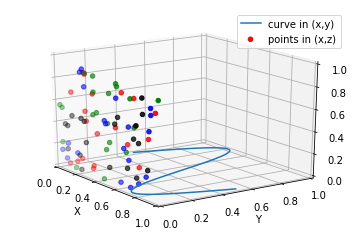

In [211]:
# 2D plot in 3D
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

# Plot a sin curve using the x and y axes.
x = np.linspace(0, 1, 100)
y = np.sin(x * 2 * np.pi) / 2 + 0.5
ax.plot(x, y, zs=0, zdir='z', label='curve in (x,y)')

# Plot scatterplot data (20 2D points per colour) on the x and z axes.
colors = ('r', 'g', 'b', 'k')
x = np.random.sample(20*len(colors))
y = np.random.sample(20*len(colors))
c_list = []
for c in colors:
    c_list.append([c]*20)
# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0, zdir='y', c=c_list, label='points in (x,z)')

# Make legend, set axes limits and labels
ax.legend()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

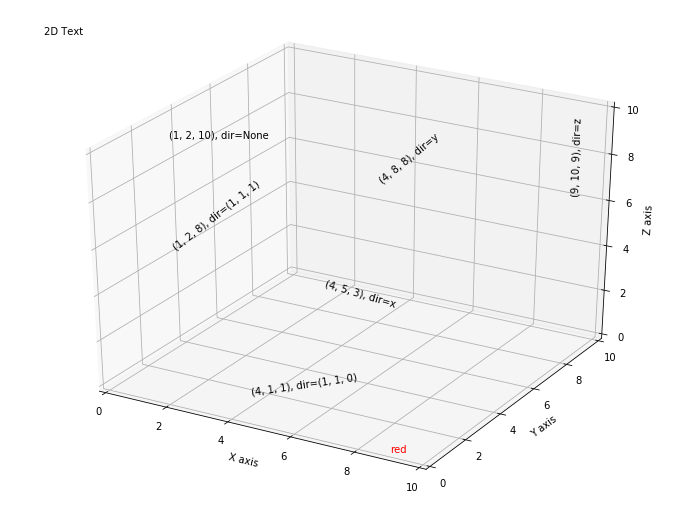

In [213]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(12,9))
ax = fig.gca(projection='3d')

# Demo 1: zdir
zdirs = (None, 'x', 'y', 'z', (1, 1, 0), (1, 1, 1))
xs = (1, 4, 4, 9, 4, 1)
ys = (2, 5, 8, 10, 1, 2)
zs = (10, 3, 8, 9, 1, 8)

for zdir, x, y, z in zip(zdirs, xs, ys, zs):
    label = '(%d, %d, %d), dir=%s' % (x, y, z, zdir)
    ax.text(x, y, z, label, zdir)

# Demo 2: color
ax.text(9, 0, 0, "red", color='red')

# Demo 3: text2D
# Placement 0, 0 would be the bottom left, 1, 1 would be the top right.
ax.text2D(0.05, 0.95, "2D Text", transform=ax.transAxes)

# Tweaking display region and labels
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.set_zlim(0, 10)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

plt.show()

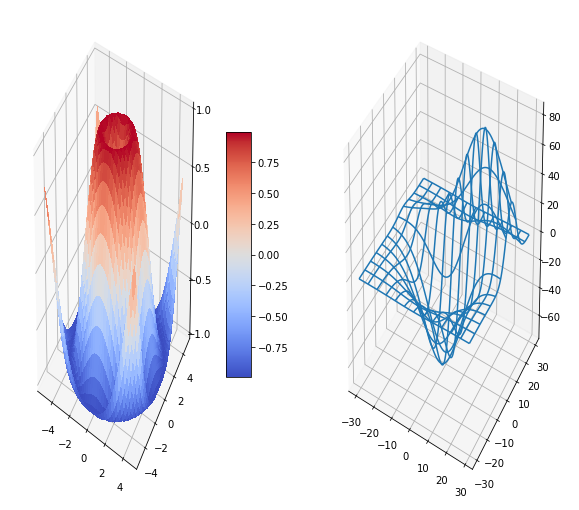

In [222]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
import numpy as np


# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(10,9))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
fig.colorbar(surf, shrink=0.5, aspect=10)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
X, Y, Z = get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)

plt.show()

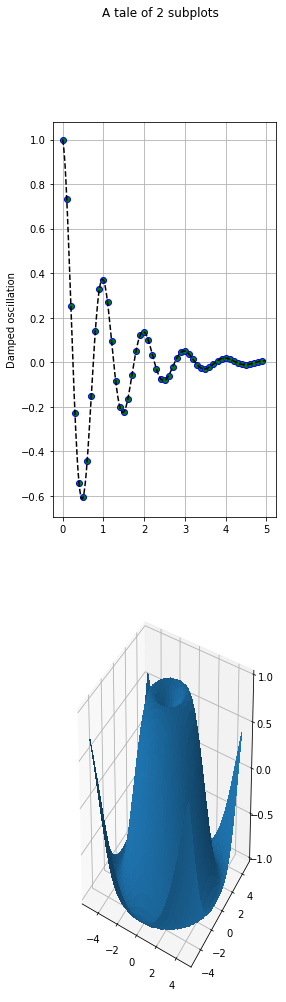

In [223]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return np.multiply(s1, e1)


################
# First subplot
################
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)

# Twice as tall as it is wide.
fig = plt.figure(figsize=plt.figaspect(5.))
fig.suptitle('A tale of 2 subplots')
ax = fig.add_subplot(2, 1, 1)
l = ax.plot(t1, f(t1), 'bo',
            t2, f(t2), 'k--', markerfacecolor='green')
ax.grid(True)
ax.set_ylabel('Damped oscillation')


#################
# Second subplot
#################
ax = fig.add_subplot(2, 1, 2, projection='3d')
X = np.arange(-5, 5, 0.25)
xlen = len(X)
Y = np.arange(-5, 5, 0.25)
ylen = len(Y)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                       linewidth=0, antialiased=False)

ax.set_zlim3d(-1, 1)

plt.show()